In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv('onlinefraud_sample.csv')
df

,Unnamed: 0,step,amount,isFraud
0,1030373,59,1367340.03,1
1,1846399,163,163294.35,1
2,2041058,181,1644749.94,1
3,1030263,51,202887.77,1
4,6271492,619,945131.71,1
...,...,...,...,...
9995,5229730,371,9787.74,0
9996,2313882,188,1175909.69,0
9997,2261432,187,194767.23,0
9998,3779632,280,6895.33,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   step        10000 non-null  int64  
 2   amount      10000 non-null  float64
 3   isFraud     10000 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 312.6 KB


In [40]:
df.describe()

,Unnamed: 0,step,amount,isFraud
count,1.000000e+04,10000.000000,1.000000e+04,10000.000000
mean,3.299078e+06,257.103400,2.767405e+05,0.100000
std,1.873977e+06,154.198381,8.459411e+05,0.300015
min,3.000000e+00,1.000000,0.000000e+00,0.000000
25%,1.677025e+06,159.000000,1.519091e+04,0.000000
50%,3.259040e+06,251.000000,8.851799e+04,0.000000
75%,4.948030e+06,351.000000,2.379120e+05,0.000000
max,6.362588e+06,741.000000,1.391170e+07,1.000000


In [10]:
df['isFraud'].value_counts()

isFraud
0    9000
1    1000
Name: count, dtype: int64

<Axes: xlabel='step', ylabel='amount'>

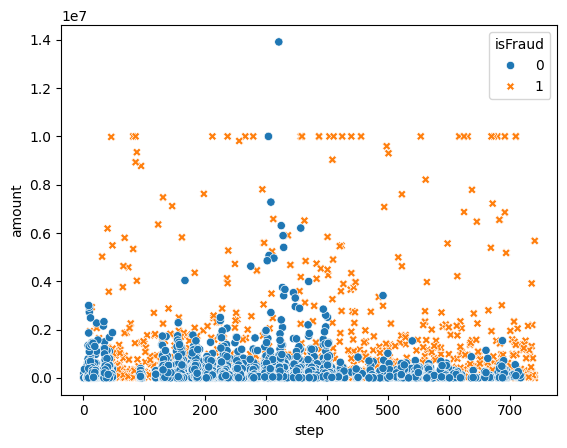

In [12]:
sns.scatterplot(data =df,x ='step', y='amount', hue = 'isFraud', style='isFraud')

##### Observation:

##### For the "amount" column: Most non-fraud transactions have a transaction value between 0 and 4 million. When the transaction value is ≥ 8 million, fraud transactions dominate, with only two non-fraud transactions in this range. This indicates that the "amount" column has a strong ability to distinguish between fraud and non-fraud transactions.

##### For the "step" column: There is no clear differentiation between the two transaction groups.

In [13]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_val, y_train, y_val = train_test_split(df.drop(columns = ['isFraud']), df['isFraud'], test_size = 0.2, random_state = 1)

In [18]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((8000, 3), (8000,), (2000, 3), (2000,))

#### Starting at K=3

In [ ]:
from sklearn.neighbors import KNeighborsClassifier(n_neighbors=k, )

In [22]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')


In [23]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [24]:
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [25]:
knn.score(x_train, y_train)

0.952625

In [26]:
knn.score(x_val, y_val)

0.926

### Test K from 1 to 30

In [27]:
acc = {'k': [], 'train_acc': [], 'val_acc': []}
for k in range (1,30):
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    knn.fit(x_train, y_train)
    train_acc = knn.score(x_train, y_train)
    val_cc = knn.score(x_val, y_val)
    acc['k'].append(k)
    acc['train_acc'].append(train_acc)
    acc['val_acc'].append(val_cc)
    

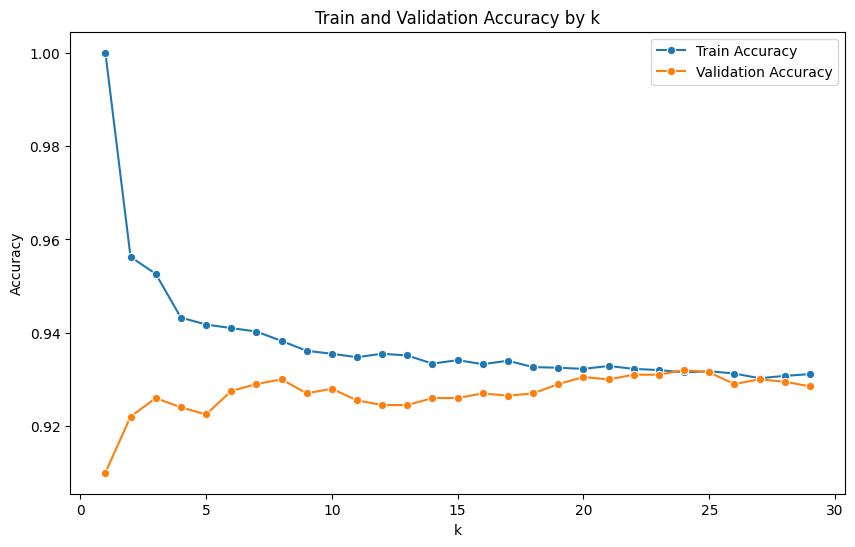

In [38]:
plt.figure(figsize=(10,6))
sns.lineplot(x='k', y='train_acc', data = acc, marker = 'o', label = 'Train Accuracy')
sns.lineplot(x='k', y = 'val_acc', data = acc, marker = 'o', label = 'Validation Accuracy')
plt.title('Train and Validation Accuracy by k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##### Observation:

#### As k increases, the model's complexity decreases, leading to a gradual decline in train accuracy.
#### When k increases from 1 to 8, validation accuracy (val_acc) increases. However, for k > 8, val_acc starts to decrease and then fluctuates slightly without significant improvement.

##### -> Best value of k:12 : when the distance of 2 line are the smallest